In [51]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Import Necessary libraries
import os 

# Set Directory path for Dataset
os.chdir("/content/drive/My Drive/")

In [103]:
import pandas as pd
import numpy as np
data_n = pd.read_csv('Final Dataset NEWSPAPERBD.csv')

In [104]:
data_n

,Url,News Paper Name,Publish Date,State,City,Country,Headline of the article in Bengali,Headline of the article in English,Text of the Article,Summarry of the Article,Category,Sub-category
0,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-13 13:28:15+06:00,Chittagong,Chittagong,Bangladesh,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,Highest number of Covid-19 deaths in a day,Nineteen people -- the highest number in 24 ho...,Nineteen people -- the highest number in 24 ho...,Statistics,NaN
1,https://www.thedailystar.net/country/news/thro...,The Daily Star,2020-05-13 00:00:00+06:00,Dhaka,Dhaka,Bangladesh,"চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...","Thrown out of job, Tangail’s chamcham makers p...",Around 1000 workers engaged in producing chamc...,As the chamcham shops are closed due to the lo...,COVID-19 Effects,Global economic impact of Corona virus
2,https://www.thedailystar.net/country/news/copi...,The Daily Star,2020-05-13 00:00:00+06:00,Chittagong,Chittagong,Bangladesh,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,Coping with Covid-19 Shutdown: 200 families re...,Family squabbles were becoming all too common ...,"The volunteer students, under the banner 'Sabu...",Social Information,Social impact
3,https://www.thedailystar.net/country/news/7-fa...,The Daily Star,2020-05-12 23:00:04+06:00,Dhaka,Dhaka,Bangladesh,"বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...","7 family members, 4 police personnel test posi...",At least eleven people tested positive for cor...,At least eleven people tested positive for cor...,COVID-19 Effects,Positive patient symptoms and identification
4,https://www.thedailystar.net/coronavirus-updat...,The Daily Star,2020-05-12 21:27:34+06:00,Dhaka,Dhaka,Bangladesh,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,Coronavirus: Health ministry issues 13 directi...,In an effort to contain the spread of coronovi...,In an effort to contain the spread of coronovi...,Government Announcement and responses,"Government guidelines, instructions and mobili..."
...,...,...,...,...,...,...,...,...,...,...,...,...
15560,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-28 02:00:00,NaN,Calcutta,India,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা,The number of victims and deaths is increasing...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্...,চীনে করোনাভাইরাসের সংক্রমণ ঠেকাতে নজিরবিহীন প্...,Statistics,NaN
15561,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-27 20:34:00,Feni,Chittagong,Bangladesh,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত,India returns passengers in fear of coronavirus,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী ন...,করোনাভাইরাস আতঙ্কে এক বাংলাদেশি পাসপোর্টধারী ন...,International Information,Repatriation
15562,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-27 18:06:00,Narayanganj,Dhaka,Bangladesh,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ,Instructions to bring back the Bangladeshis tr...,প্রধানমন্ত্রী শেখ হাসিনা মারাত্মক করোনাভাইরাস ...,প্রধানমন্ত্রী শেখ হাসিনা মারাত্মক করোনাভাইরাস ...,International Information,Repatriation
15563,https://www.kalerkantho.com/online/national/20...,Kaler Kantho,2020-01-26 18:01:00,Narayanganj,Dhaka,Bangladesh,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,Coronavirus: Control room opened in the Depart...,দেশের বাইরে থেকে করোনাভাইরাস নিয়ে কেউ দেশে আস...,দেশের বাইরে থেকে করোনাভাইরাস নিয়ে কেউ দেশে আস...,Government Announcement and responses,"Government guidelines, instructions and mobili..."


In [55]:
df_Text = pd.read_csv('Text3.csv')

In [56]:
!pip install pyLDAvis

In [57]:
import re
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer

from gensim.corpora import Dictionary
from gensim.models import LdaModel

import pyLDAvis
import pyLDAvis.gensim as gensimvis

In [58]:
class SentenceTokenizer(PunktSentenceTokenizer):
    pass


class ParagraphTokenizer(object):
    """A simple paragraph tokenizer that creates a paragraph break whenever
    the newline character appears between two sentences."""

    sentence_tokenizer = SentenceTokenizer()

    def span_tokenize(self, text):
        '''Returns a list of paragraph spans.'''
        sentence_spans = list(self.sentence_tokenizer.span_tokenize(text))
        breaks = []
        for i in range(len(sentence_spans) - 1):
            sentence_divider = text[sentence_spans[i][1]: \
                sentence_spans[i+1][0]]
            if '\n' in sentence_divider:
                breaks.append(i)
        paragraph_spans = []
        start = 0
        for break_idx in breaks:
            paragraph_spans.append((start, sentence_spans[break_idx][1]))
            start = sentence_spans[break_idx+1][0]
        paragraph_spans.append((start, sentence_spans[-1][1]))
        return paragraph_spans

In [106]:
new = data_n["Publish Date"].str.split(" ", n = 1, expand = True) 

In [60]:
new[0]

0        2020-05-13
1        2020-05-13
2        2020-05-13
3        2020-05-12
4        2020-05-12
            ...    
15560    2020-01-28
15561    2020-01-27
15562    2020-01-27
15563    2020-01-26
15564    2020-01-25
Name: 0, Length: 15565, dtype: object

In [61]:
df_Text['Date'] = new[0]
df_Text['Country'] = data['City'].copy()


In [62]:
# debates = df_Text.sort_values(['Date', 'Country']).reset_index(drop=True)

# paragraph_tokenizer = ParagraphTokenizer()
# paragraphs = pd.Series(
#     debates.text
#     .apply(lambda x: [x[start:end] for start, end
#                         in paragraph_tokenizer.span_tokenize(x)])
#     .apply(lambda x: pd.Series(x))
#     .stack()
#     .reset_index(level=1, drop=True), name='text')
# debates_paragraphs = (debates
#                         .drop('text', axis=1)
#                         .join(paragraphs)
#                         .reset_index())
#     # Must retain this new index to preserve ordering of paragraphs within
#     # each speech.
# debates_paragraphs.index.name = 'paragraph_index'

# Start

In [63]:
!pip install pycountry

In [64]:
# general packages used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import pycountry
import re
import os

import nltk
import nltk.stem
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
# some pre-set defaults for plotting

from matplotlib.pylab import rcParams
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

In [67]:
data = pd.read_csv('un-general-debates.csv', index_col=0) 
# data is from Kaggle and downloaded to the same directory where the notebook is

In [68]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))


There are 7507 observations and 3 features in this dataset. 



In [69]:
data

,year,country,text
session,,,
44,1989,MDV,﻿It is indeed a pleasure for me and the member...
44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
44,1989,URY,﻿\nDuring the debate at the fortieth session o...
44,1989,ZWE,﻿I should like at the outset to express my del...
...,...,...,...
56,2001,KAZ,﻿This session\nthat is taking place under extr...
56,2001,LBR,﻿I am honoured to\nparticipate in this histori...
56,2001,BDI,﻿It\nis for me a signal honour to take the flo...


In [70]:

import pandas as pd
import numpy as np
data['year'] =  pd.DatetimeIndex(data['year']).astype ( np.int64 )
data['ts'] = data.year.values.astype(np.int64)

In [71]:
# add column for full country name
country_name = []
for code in data['country']:
    try:
        country_name.append(pycountry.countries.lookup(code).name)
    except LookupError:
        country_name.append('')
data['country_name'] = country_name

In [72]:
data.head(1)

,year,country,text,ts,country_name
session,,,,,
44,1989,MDV,﻿It is indeed a pleasure for me and the member...,1989,Maldives


In [73]:
# remove data with null value in year column
data = data[data['year'].notnull()]

# remove data with null values in country_name column
data = data[data['country_name'].notnull()]

In [74]:
# lets do some cleaning of the text, remove unusual symbols from the text, creating new text_clean column

# convert text data to lower case (for easier analysis)
data['text_clean'] = data['text'].str.lower()

def clean(s):    
    # Remove any tags:
    cleaned = re.sub(r"(?s)<.?>", " ", s)
    # Keep only regular chars:
    cleaned = re.sub(r"[^A-Za-z0-9(),*!?\'\`]", " ", cleaned)
    # Remove unicode chars
    cleaned = re.sub("\\\\u(.){4}", " ", cleaned)
    return cleaned.strip()

# clean text
data['text_clean'] = data.text_clean.apply(lambda x: clean(x))

In [75]:
# create a unique ID for index

data['ID'] = range(1, len(data.index)+1)

data = data.set_index('ID')

In [76]:
import nltk
nltk.download('punkt')
# tockenize text
data['token'] = data['text_clean'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [77]:
# Gensim
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
data['clean'] = data['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
data.head() #  check out how data looks like now, after all this cleaning and munging

,year,country,text,ts,country_name,text_clean,token,clean
ID,,,,,,,,
1,1989,MDV,﻿It is indeed a pleasure for me and the member...,1989,Maldives,it is indeed a pleasure for me and the members...,"[it, is, indeed, a, pleasure, for, me, and, th...","[indeed, pleasure, members, delegation, extend..."
2,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",1989,Finland,"may i begin by congratulating you sir, on you...","[may, i, begin, by, congratulating, you, sir, ...","[may, begin, congratulating, sir, election, pr..."
3,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",1989,Niger,"mr president, it is a particular pleasure for...","[mr, president, ,, it, is, a, particular, plea...","[mr, president, particular, pleasure, behalf, ..."
4,1989,URY,﻿\nDuring the debate at the fortieth session o...,1989,Uruguay,during the debate at the fortieth session of t...,"[during, the, debate, at, the, fortieth, sessi...","[debate, fortieth, session, general, assembly,..."
5,1989,ZWE,﻿I should like at the outset to express my del...,1989,Zimbabwe,i should like at the outset to express my dele...,"[i, should, like, at, the, outset, to, express...","[like, outset, express, delegation, satisfacti..."


In [123]:
import pickle
data_clean = pd.read_pickle('data_clean.pkl')

In [125]:
data_clean

,Text_en,Text_bn,Text_en_clean,Text_en_clean_2
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,highest number of covid deaths in a day ninete...,"[highest, number, covid, death, day, nineteen,..."
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",thrown out of job tangails chamcham makers pas...,"[thrown, job, tangails, chamcham, maker, pas, ..."
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,coping with covid shutdown families reaping b...,"[coping, covid, shutdown, family, reaping, ben..."
3,"7 family members, 4 police personnel test posi...","বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...",family members police personnel test positiv...,"[family, member, police, personnel, test, posi..."
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,coronavirus health ministry issues directives...,"[coronavirus, health, ministry, issue, directi..."
...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,the number of victims and deaths is increasing...,"[number, victim, death, increasing, leap, bound]"
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,india returns passengers in fear of coronaviru...,"[india, return, passenger, fear, coronavirus]"
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,instructions to bring back the bangladeshis tr...,"[instruction, bring, back, bangladeshi, trappe..."
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,coronavirus control room opened in the departm...,"[coronavirus, control, room, opened, departmen..."


In [157]:
datee = new[0]

AttributeError: ignored

In [158]:
datee = datee.tolist()

In [163]:
datee.sort()
datee[-100:]

['2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-18',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-19',
 '2020-05-

In [126]:
data_clean['Date'] = new[0]

In [127]:
data_clean

,Text_en,Text_bn,Text_en_clean,Text_en_clean_2,Date
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,highest number of covid deaths in a day ninete...,"[highest, number, covid, death, day, nineteen,...",2020-05-13
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",thrown out of job tangails chamcham makers pas...,"[thrown, job, tangails, chamcham, maker, pas, ...",2020-05-13
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,coping with covid shutdown families reaping b...,"[coping, covid, shutdown, family, reaping, ben...",2020-05-13
3,"7 family members, 4 police personnel test posi...","বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...",family members police personnel test positiv...,"[family, member, police, personnel, test, posi...",2020-05-12
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,coronavirus health ministry issues directives...,"[coronavirus, health, ministry, issue, directi...",2020-05-12
...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,the number of victims and deaths is increasing...,"[number, victim, death, increasing, leap, bound]",2020-01-28
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,india returns passengers in fear of coronaviru...,"[india, return, passenger, fear, coronavirus]",2020-01-27
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,instructions to bring back the bangladeshis tr...,"[instruction, bring, back, bangladeshi, trappe...",2020-01-27
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,coronavirus control room opened in the departm...,"[coronavirus, control, room, opened, departmen...",2020-01-26


In [128]:
data_clean['Date'] = pd.to_datetime(data_clean['Date'], utc=False)

In [129]:
data_clean

,Text_en,Text_bn,Text_en_clean,Text_en_clean_2,Date
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,highest number of covid deaths in a day ninete...,"[highest, number, covid, death, day, nineteen,...",2020-05-13
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",thrown out of job tangails chamcham makers pas...,"[thrown, job, tangails, chamcham, maker, pas, ...",2020-05-13
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,coping with covid shutdown families reaping b...,"[coping, covid, shutdown, family, reaping, ben...",2020-05-13
3,"7 family members, 4 police personnel test posi...","বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...",family members police personnel test positiv...,"[family, member, police, personnel, test, posi...",2020-05-12
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,coronavirus health ministry issues directives...,"[coronavirus, health, ministry, issue, directi...",2020-05-12
...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,the number of victims and deaths is increasing...,"[number, victim, death, increasing, leap, bound]",2020-01-28
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,india returns passengers in fear of coronaviru...,"[india, return, passenger, fear, coronavirus]",2020-01-27
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,instructions to bring back the bangladeshis tr...,"[instruction, bring, back, bangladeshi, trappe...",2020-01-27
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,coronavirus control room opened in the departm...,"[coronavirus, control, room, opened, departmen...",2020-01-26


In [132]:
data_clean['Week Number']  = data_clean['Date'].dt.week

In [134]:
data_clean

,Text_en,Text_bn,Text_en_clean,Text_en_clean_2,Date,Week Number
0,Highest number of Covid-19 deaths in a day. Ni...,একদিনে কোভিড -১৯ এর সর্বোচ্চ সংখ্যা,highest number of covid deaths in a day ninete...,"[highest, number, covid, death, day, nineteen,...",2020-05-13,20
1,"Thrown out of job, Tangail’s chamcham makers p...","চাকরি থেকে ছিটকে পড়ে, টাঙ্গাইলের চামচাম নির্ম...",thrown out of job tangails chamcham makers pas...,"[thrown, job, tangails, chamcham, maker, pas, ...",2020-05-13,20
2,Coping with Covid-19 Shutdown: 200 families re...,কোভিড -১৯ শাটডাউন মোকাবেলা: ২০০ পরিবার উদ্যানে...,coping with covid shutdown families reaping b...,"[coping, covid, shutdown, family, reaping, ben...",2020-05-13,20
3,"7 family members, 4 police personnel test posi...","বগুড়ার কোভিড -১৯ এর জন্য সাত পরিবারের সদস্য, ...",family members police personnel test positiv...,"[family, member, police, personnel, test, posi...",2020-05-12,20
4,Coronavirus: Health ministry issues 13 directi...,করোনাভাইরাস: স্বাস্থ্য মন্ত্রনালয় সরকারি কর্ম...,coronavirus health ministry issues directives...,"[coronavirus, health, ministry, issue, directi...",2020-05-12,20
...,...,...,...,...,...,...
15560,The number of victims and deaths is increasing...,লাফিয়ে বাড়ছে আক্রান্ত ও মৃতের সংখ্যা| চীনে করো...,the number of victims and deaths is increasing...,"[number, victim, death, increasing, leap, bound]",2020-01-28,5
15561,India returns passengers in fear of coronaviru...,করোনাভাইরাস আতঙ্কে যাত্রী ফেরত দিয়েছে ভারত| কর...,india returns passengers in fear of coronaviru...,"[india, return, passenger, fear, coronavirus]",2020-01-27,5
15562,Instructions to bring back the Bangladeshis tr...,চীনে আটকে পড়া বাংলাদেশিদের ফিরিয়ে আনার নির্দেশ...,instructions to bring back the bangladeshis tr...,"[instruction, bring, back, bangladeshi, trappe...",2020-01-27,5
15563,Coronavirus: Control room opened in the Depart...,করোনাভাইরাস : স্বাস্থ্য অধিদপ্তরে কন্ট্রোল রুম...,coronavirus control room opened in the departm...,"[coronavirus, control, room, opened, departmen...",2020-01-26,4


In [112]:
data

,year,country,text,ts,country_name,text_clean,token,clean
ID,,,,,,,,
1,1989,MDV,﻿It is indeed a pleasure for me and the member...,1989,Maldives,it is indeed a pleasure for me and the members...,"[it, is, indeed, a, pleasure, for, me, and, th...","[indeed, pleasure, members, delegation, extend..."
2,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",1989,Finland,"may i begin by congratulating you sir, on you...","[may, i, begin, by, congratulating, you, sir, ...","[may, begin, congratulating, sir, election, pr..."
3,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",1989,Niger,"mr president, it is a particular pleasure for...","[mr, president, ,, it, is, a, particular, plea...","[mr, president, particular, pleasure, behalf, ..."
4,1989,URY,﻿\nDuring the debate at the fortieth session o...,1989,Uruguay,during the debate at the fortieth session of t...,"[during, the, debate, at, the, fortieth, sessi...","[debate, fortieth, session, general, assembly,..."
5,1989,ZWE,﻿I should like at the outset to express my del...,1989,Zimbabwe,i should like at the outset to express my dele...,"[i, should, like, at, the, outset, to, express...","[like, outset, express, delegation, satisfacti..."
...,...,...,...,...,...,...,...,...
7503,2001,KAZ,﻿This session\nthat is taking place under extr...,2001,Kazakhstan,this session that is taking place under extrao...,"[this, session, that, is, taking, place, under...","[session, taking, place, extraordinary, circum..."
7504,2001,LBR,﻿I am honoured to\nparticipate in this histori...,2001,Liberia,i am honoured to participate in this historic ...,"[i, am, honoured, to, participate, in, this, h...","[honoured, participate, historic, session, beh..."
7505,2001,BDI,﻿It\nis for me a signal honour to take the flo...,2001,Burundi,it is for me a signal honour to take the floor...,"[it, is, for, me, a, signal, honour, to, take,...","[signal, honour, take, floor, today, assembly,..."


In [138]:
all_per_year = data_clean.groupby('Week Number').agg({'Week Number': 'mean', 'Text_en_clean_2': 'sum'})
# all_per_year.to_csv('all_per_year.csv', sep='|') # in case you want to write it out as csv file


In [139]:
all_per_year

,Week Number,Text_en_clean_2
Week Number,,
4,4,"[coronavirus, protect, wuhan, coronavirus, off..."
5,5,"[bangladeshi, return, china, sent, hospital, t..."
6,6,"[coronavirus, outbreak, die, single, day, chin..."
7,7,"[coronavirus, detection, china, sending, advan..."
8,8,"[coronavirusinfected, bangladeshi, critical, s..."
9,9,"[coronavirus, cant, tame, bangladesh, growth, ..."
10,10,"[bangladeshi, milan, infected, coronavirus, on..."
11,11,"[qatar, suspends, entry, traveller, bangladesh..."
12,12,"[first, coronavirus, vaccine, trial, start, to..."


In [145]:
all_per_year = all_per_year.loc[:21].copy()

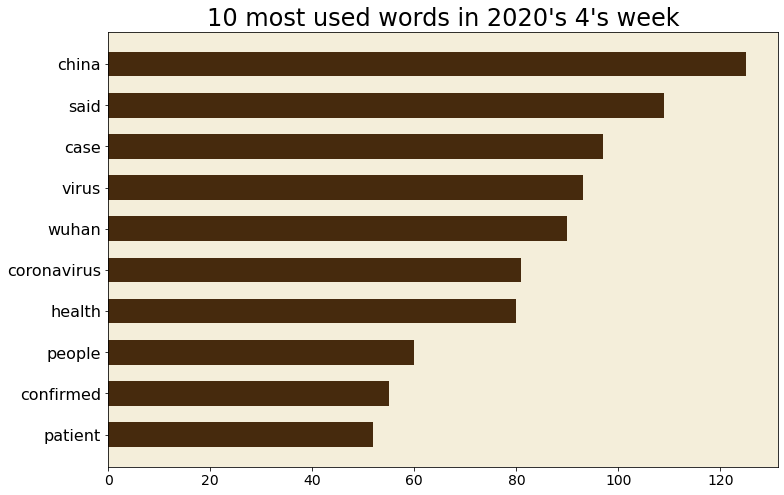

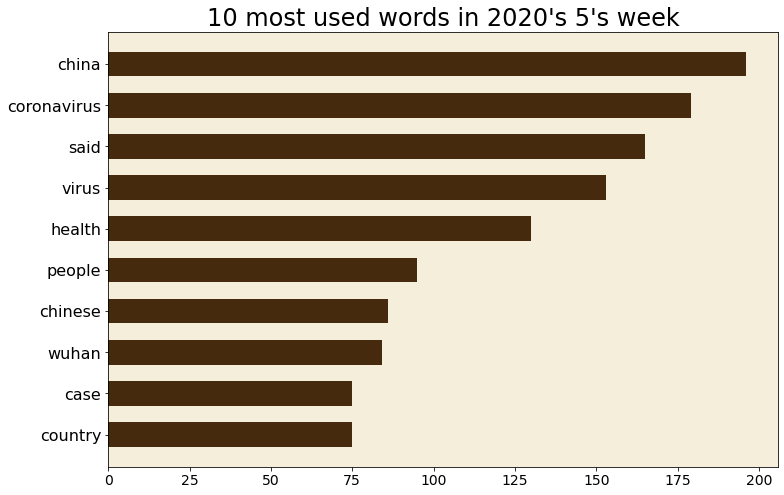

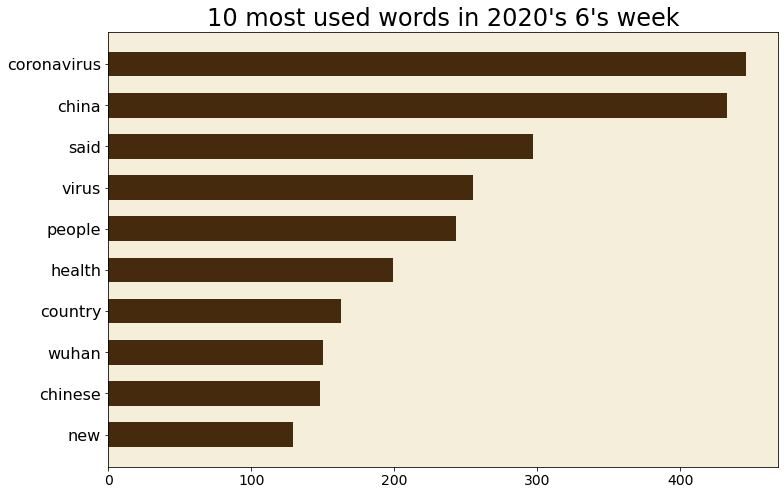

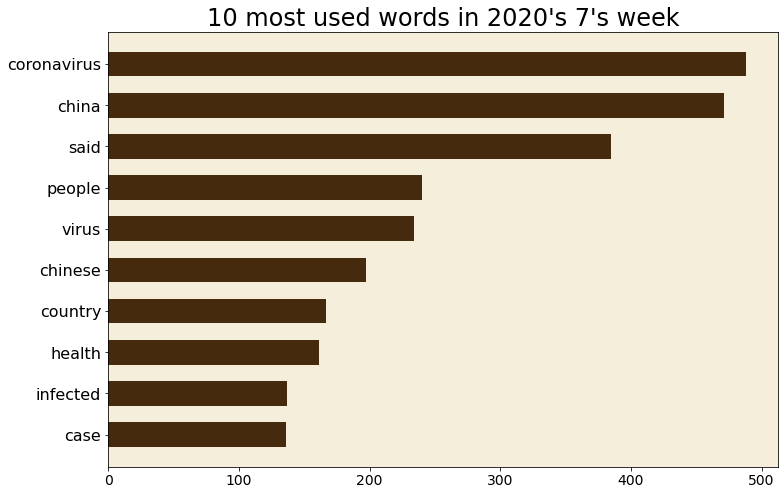

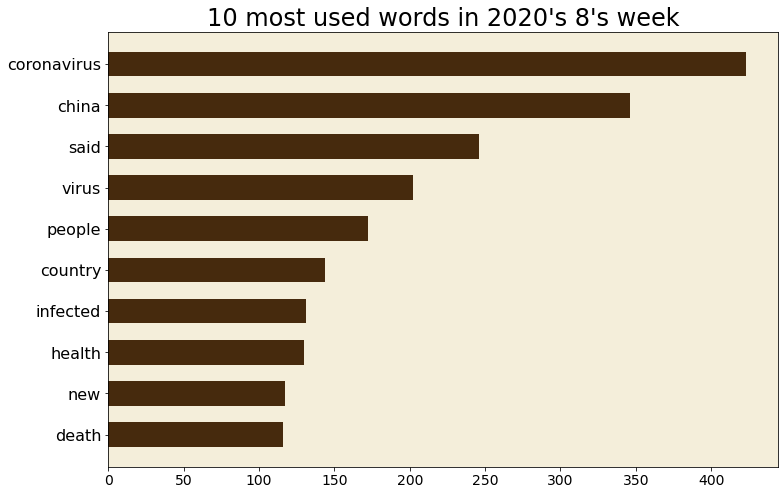

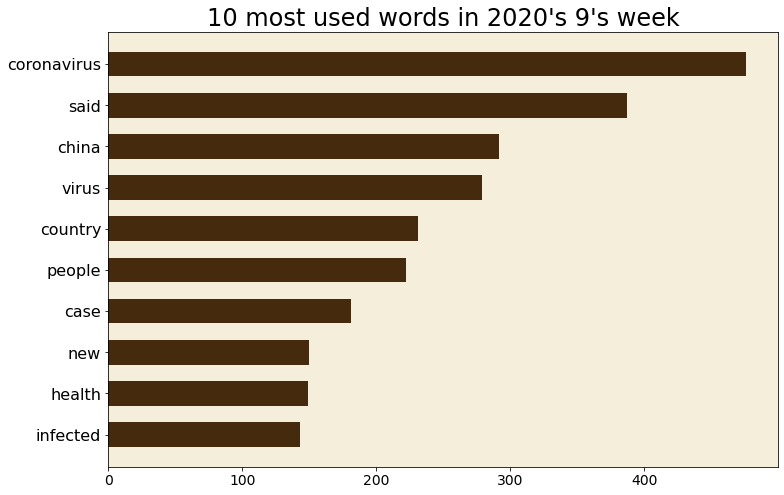

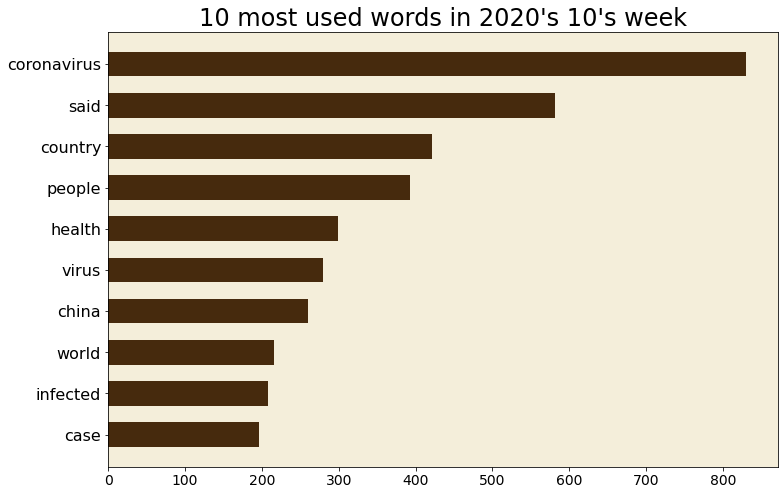

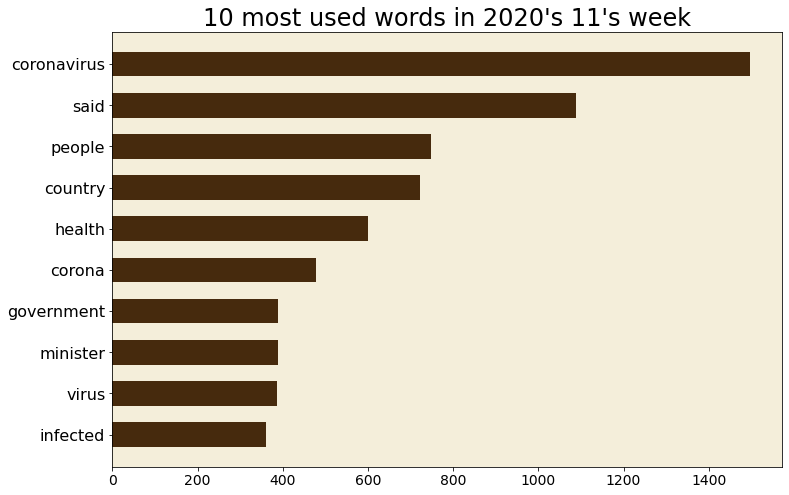

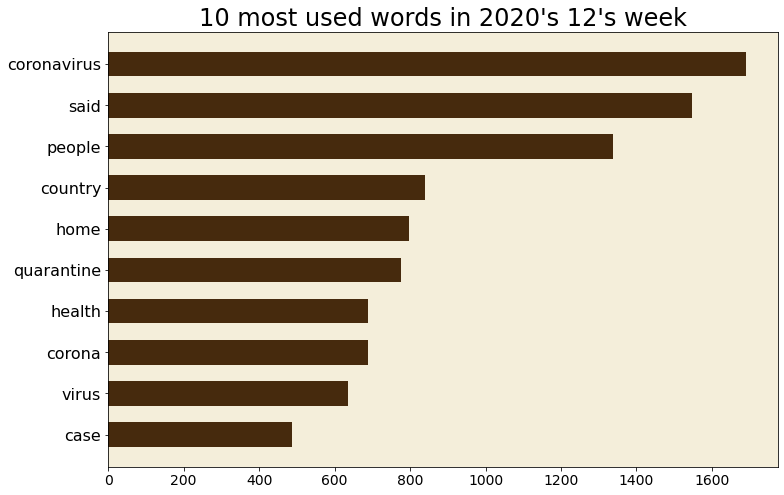

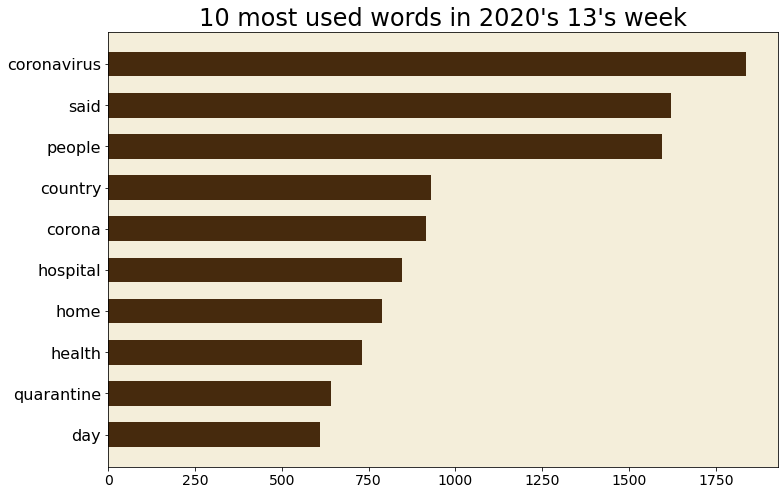

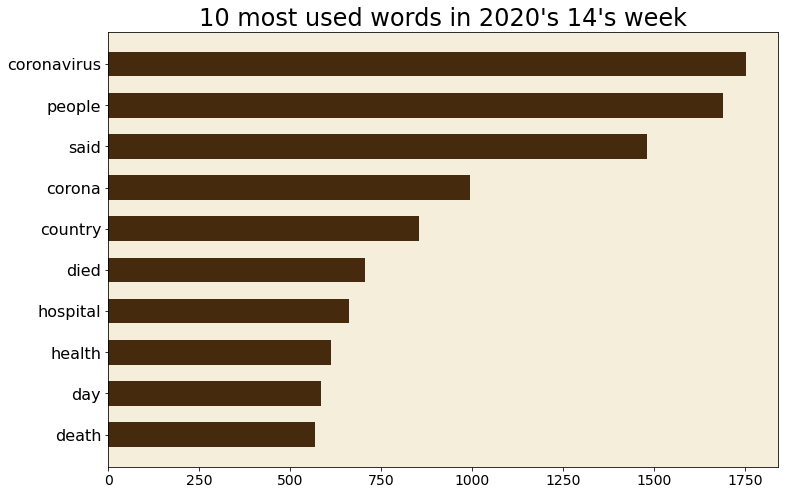

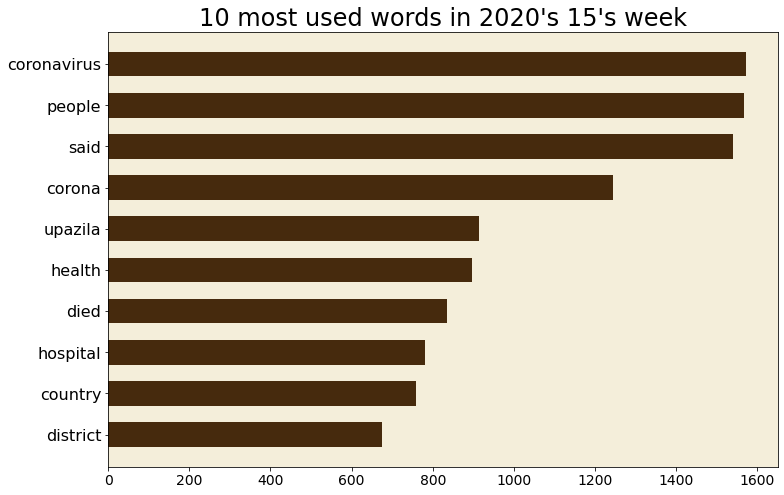

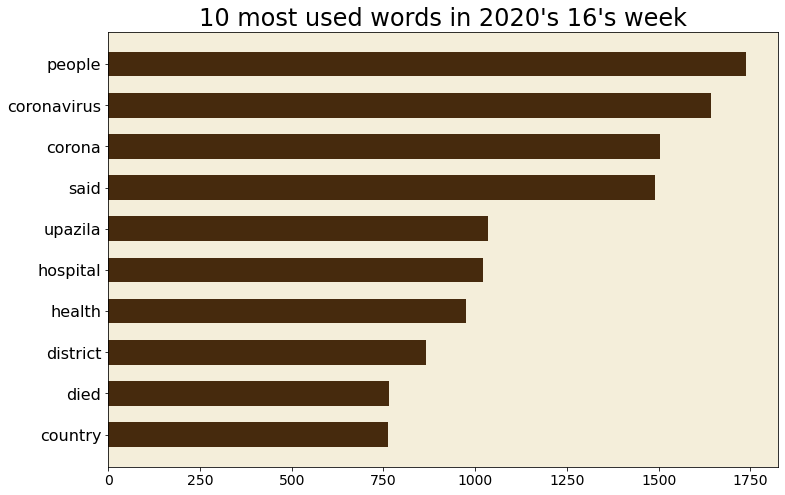

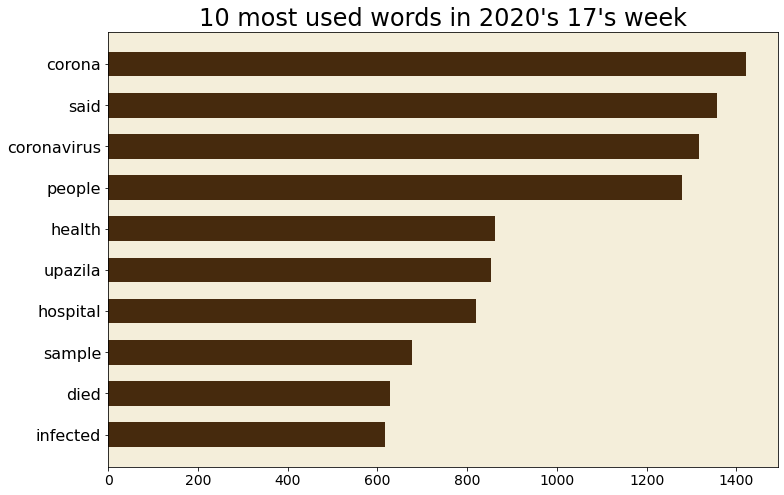

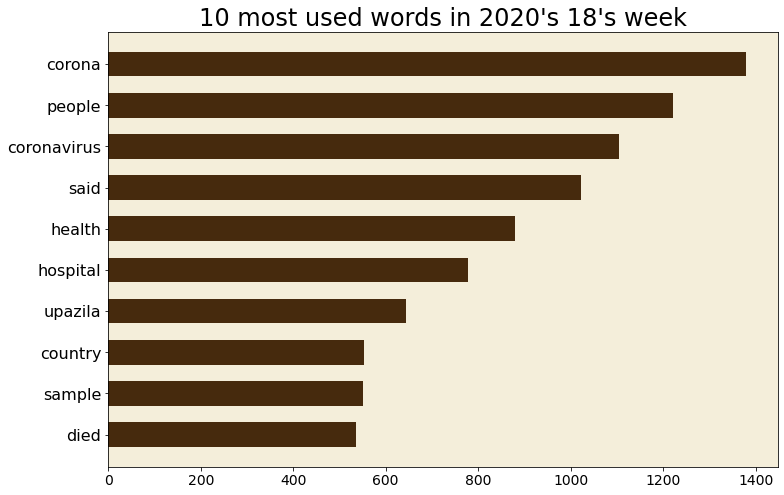

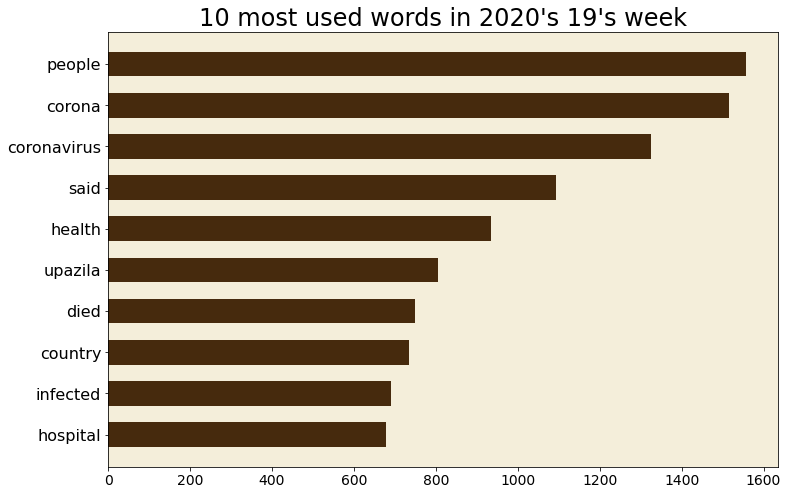

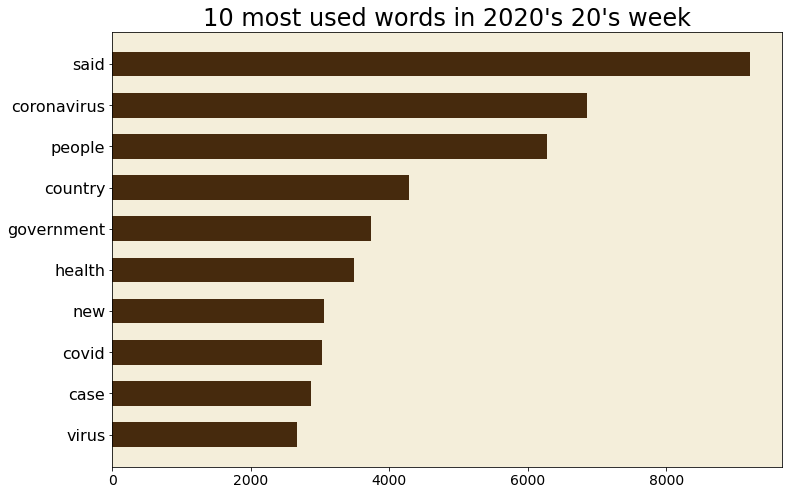

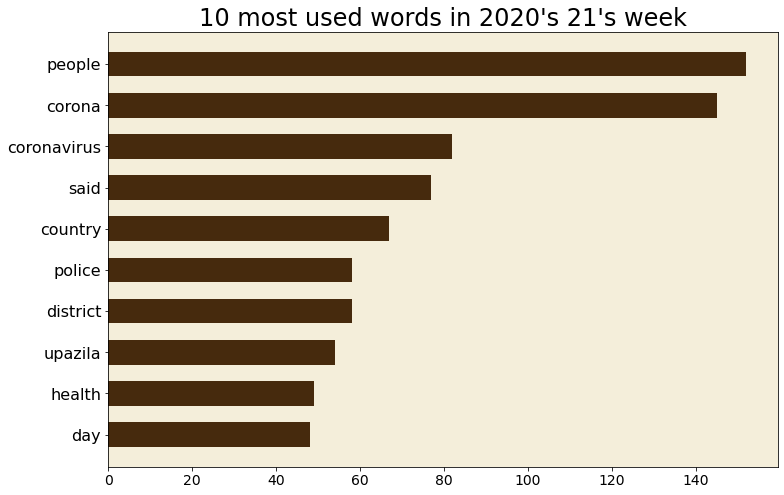

In [146]:
rcParams['figure.figsize'] = 12, 8 # I like bigger plots

for i, row in all_per_year.iterrows():
    sess = dict(nltk.FreqDist(row['Text_en_clean_2']))
    sort_sess = sorted(sess.items(), key=lambda x: x[1], reverse=True)[0:10] # top how many? 
    plt.barh(range(len(sort_sess)), [val[1] for val in sort_sess], align='center', height=0.6, color='#462a0d')
    plt.yticks(range(len(sort_sess)), [val[0] for val in sort_sess])
    plt.yticks(rotation=0)
    plt.yticks(fontsize=16)
    plt.title("10 most used words in 2020's %d's week" % row['Week Number'],fontsize=24)
    ax = plt.gca()
    ax.set_facecolor('#F4EEDA')
    ax.invert_yaxis() # makes sure it is ordered from most to least
    plt.show()

In [147]:
# get frequencies by year

freqs = {}
for i, speech in data_clean.iterrows():
    Week_Number = speech['Week Number']
    for token in speech['Text_en_clean_2']:
        if token not in freqs:
            freqs[token] = {"total_freq":1, Week_Number:1}
        else:
            freqs[token]["total_freq"] += 1
            if not freqs[token].get(Week_Number):
                freqs[token][Week_Number] = 1
            else:
                freqs[token][Week_Number] += 1

In [148]:
freqs_df = pd.DataFrame.from_dict(freqs, orient='index')
freqs_df['word'] = freqs_df.index

In [149]:
# Example of data for the "clean" of the word "refuge"
freqs_df[freqs_df.index == "china"]

,total_freq,20,12,13,14,15,16,17,18,19,6,9,11,10,7,8,5,21,4,48,word
china,5949,1951.0,326.0,344.0,296.0,167.0,172.0,88.0,102.0,151.0,433.0,292.0,211.0,260.0,471.0,346.0,196.0,16.0,125.0,2.0,china


In [150]:
new_cols = ["total_freq", "word"] + sorted(freqs_df.columns.tolist()[1:-1])
freqs_df = freqs_df[new_cols]

freqs_df = freqs_df.sort_values('total_freq', ascending=False)

# freqs_df.to_csv('all_per_year_clean.csv', sep='|') #  in case you want to write this out as csv file

freqs_df.head()

,total_freq,word,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,48
said,23704,said,109.0,165.0,297.0,385.0,246.0,387.0,581.0,1088.0,1548.0,1622.0,1480.0,1541.0,1489.0,1357.0,1022.0,1094.0,9212.0,77.0,4.0
coronavirus,23613,coronavirus,81.0,179.0,446.0,488.0,423.0,476.0,830.0,1497.0,1690.0,1837.0,1752.0,1572.0,1642.0,1317.0,1105.0,1326.0,6851.0,82.0,19.0
people,20606,people,60.0,95.0,243.0,240.0,172.0,222.0,393.0,747.0,1338.0,1595.0,1688.0,1567.0,1738.0,1278.0,1221.0,1557.0,6286.0,152.0,14.0
country,12247,country,45.0,75.0,163.0,167.0,144.0,231.0,422.0,723.0,840.0,929.0,854.0,759.0,762.0,483.0,553.0,735.0,4291.0,67.0,4.0
corona,12094,corona,1.0,2.0,32.0,66.0,59.0,84.0,187.0,478.0,688.0,915.0,995.0,1244.0,1505.0,1421.0,1379.0,1516.0,1377.0,145.0,NaN


In [165]:
freqs_df.drop(48, axis=1, inplace=True)

In [170]:
freqs_df.head(50)

,total_freq,word,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
said,23704,said,109.0,165.0,297.0,385.0,246.0,387.0,581.0,1088.0,1548.0,1622.0,1480.0,1541.0,1489.0,1357.0,1022.0,1094.0,9212.0,77.0
coronavirus,23613,coronavirus,81.0,179.0,446.0,488.0,423.0,476.0,830.0,1497.0,1690.0,1837.0,1752.0,1572.0,1642.0,1317.0,1105.0,1326.0,6851.0,82.0
people,20606,people,60.0,95.0,243.0,240.0,172.0,222.0,393.0,747.0,1338.0,1595.0,1688.0,1567.0,1738.0,1278.0,1221.0,1557.0,6286.0,152.0
country,12247,country,45.0,75.0,163.0,167.0,144.0,231.0,422.0,723.0,840.0,929.0,854.0,759.0,762.0,483.0,553.0,735.0,4291.0,67.0
corona,12094,corona,1.0,2.0,32.0,66.0,59.0,84.0,187.0,478.0,688.0,915.0,995.0,1244.0,1505.0,1421.0,1379.0,1516.0,1377.0,145.0
health,11864,health,80.0,130.0,199.0,161.0,130.0,149.0,299.0,600.0,688.0,730.0,611.0,897.0,974.0,861.0,879.0,934.0,3491.0,49.0
hospital,9073,hospital,28.0,74.0,115.0,98.0,67.0,50.0,116.0,269.0,403.0,845.0,661.0,780.0,1022.0,819.0,779.0,678.0,2216.0,42.0
government,7743,government,16.0,56.0,90.0,90.0,46.0,71.0,174.0,389.0,427.0,489.0,515.0,427.0,389.0,327.0,199.0,287.0,3734.0,13.0
infected,7589,infected,34.0,50.0,112.0,137.0,131.0,143.0,208.0,361.0,449.0,510.0,487.0,535.0,718.0,617.0,526.0,691.0,1839.0,37.0
virus,7537,virus,93.0,153.0,255.0,234.0,202.0,279.0,280.0,387.0,635.0,481.0,483.0,327.0,260.0,298.0,228.0,245.0,2669.0,26.0


In [236]:

freqs_df.to_pickle('freqs_df.pkl')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-236-89f8c4bdd139>", line 1, in <module>
    freqs_df.to_pickle('freqs_df.pkl')
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py", line 2673, in to_pickle
    to_pickle(self, path, compression=compression, protocol=protocol)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/pickle.py", line 83, in to_pickle
    f, fh = get_handle(fp_or_buf, "wb", compression=compression, is_text=False)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/common.py", line 418, in get_handle
    from s3fs import S3File
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 951, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 894, in _find_spec
  File "<frozen importlib._bootstrap_

OSError: ignored

In [232]:
!fusermount -u drive
!google-drive-ocamlfuse drive

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
fusermount: bad mount point drive: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/bin/bash: google-drive-ocamlfuse: command not found


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-235-1aa637bd5f94>", line 4, in <module>
    axes = plt.gca()
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py", line 5136, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'gca'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, 

AttributeError: ignored

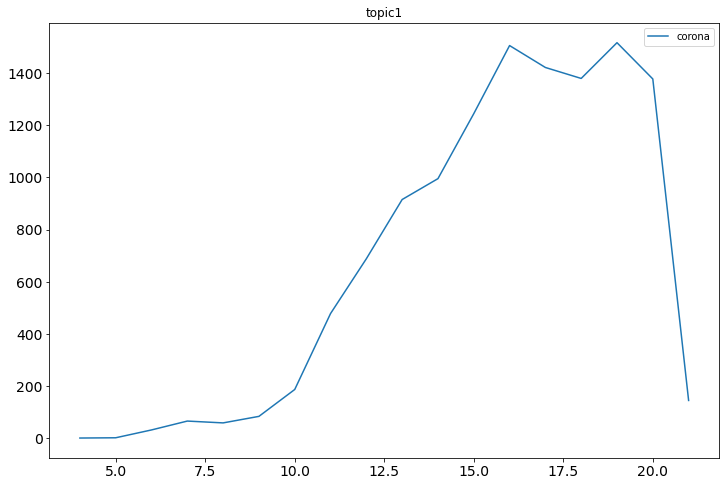

In [235]:
# you can plot words frequency over time

freqs_df[freqs_df['word'].isin(['corona'])].iloc[:, 1:47].transpose().iloc[1:].plot(title="topic1")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
axes.title('haaaaaaaaaaa')
plt.show()

In [212]:
# you can plot words frequency over time
fpath = 'kalpurush.ttf'
fig, (ax) = plt.subplots(1,1, figsize=(21,12))
freqs_df[freqs_df['word'].isin(['corona'])].iloc[:, 1:21].transpose().iloc[1:].plot()

plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-212-d1500582f292>", line 3, in <module>
    fig, (ax) = plt.subplots(1,1, figsize=(21,12))
  File "/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py", line 5136, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'subplots'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IP

AttributeError: ignored

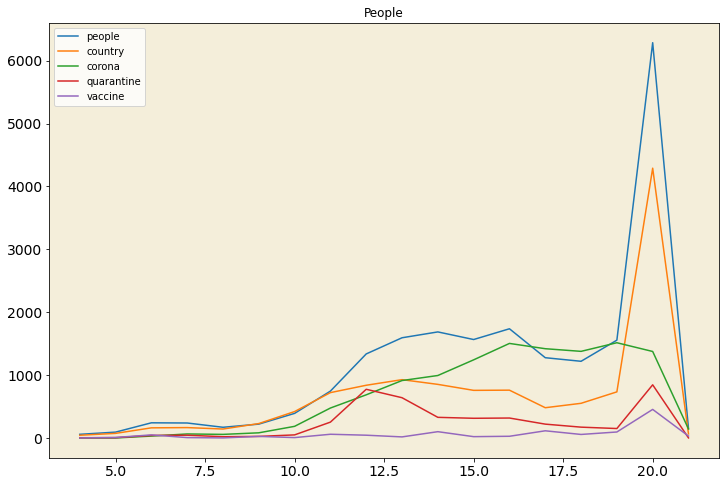

In [171]:
# you can plot words frequency over time

freqs_df[freqs_df['word'].isin(['people', 'country', 'corona', 'vaccine', 'quarantine'])].iloc[:, 1:47].transpose().iloc[1:].plot(title="People")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
plt.show()

# DTM

In [88]:
import re
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer

from gensim.corpora import Dictionary
from gensim.models import LdaModel

import pyLDAvis
import pyLDAvis.gensim as gensimvis

In [89]:
class SentenceTokenizer(PunktSentenceTokenizer):
    pass


class ParagraphTokenizer(object):
    """A simple paragraph tokenizer that creates a paragraph break whenever
    the newline character appears between two sentences."""

    sentence_tokenizer = SentenceTokenizer()

    def span_tokenize(self, text):
        '''Returns a list of paragraph spans.'''
        sentence_spans = list(self.sentence_tokenizer.span_tokenize(text))
        breaks = []
        for i in range(len(sentence_spans) - 1):
            sentence_divider = text[sentence_spans[i][1]: \
                sentence_spans[i+1][0]]
            if '\n' in sentence_divider:
                breaks.append(i)
        paragraph_spans = []
        start = 0
        for break_idx in breaks:
            paragraph_spans.append((start, sentence_spans[break_idx][1]))
            start = sentence_spans[break_idx+1][0]
        paragraph_spans.append((start, sentence_spans[-1][1]))
        return paragraph_spans

In [90]:
# splitting data into paragraphs

debates = data.sort_values(['year', 'country_name']).reset_index(drop=True)

paragraph_tokenizer = ParagraphTokenizer()
paragraphs = pd.Series(
    debates.text
    .apply(lambda x: [x[start:end] for start, end
                        in paragraph_tokenizer.span_tokenize(x)])
    .apply(lambda x: pd.Series(x))
    .stack()
    .reset_index(level=1, drop=True), name='text')
debates_paragraphs = (debates
                        .drop('text', axis=1)
                        .join(paragraphs)
                        .reset_index())
    # Must retain this new index to preserve ordering of paragraphs within
    # each speech.
debates_paragraphs.index.name = 'paragraph_index'

In [91]:
debates_paragraphs.head()

,index,year,country,ts,country_name,text_clean,token,clean,text
paragraph_index,,,,,,,,,
0,0,1970,YUG,1970,,"81 mr president, i should like to address ...","[81, mr, president, ,, i, should, like, to, ad...","[81, mr, president, like, address, first, word...","\n81.\t Mr. President, I should like to addre..."
1,0,1970,YUG,1970,,"81 mr president, i should like to address ...","[81, mr, president, ,, i, should, like, to, ad...","[81, mr, president, like, address, first, word...","82.\tYugoslavia, as one of the founders of the..."
2,0,1970,YUG,1970,,"81 mr president, i should like to address ...","[81, mr, president, ,, i, should, like, to, ad...","[81, mr, president, like, address, first, word...",83.\tThe image of the world has been significa...
3,0,1970,YUG,1970,,"81 mr president, i should like to address ...","[81, mr, president, ,, i, should, like, to, ad...","[81, mr, president, like, address, first, word...","84.\tFor all these reasons, we are faced with ..."
4,0,1970,YUG,1970,,"81 mr president, i should like to address ...","[81, mr, president, ,, i, should, like, to, ad...","[81, mr, president, like, address, first, word...",85.\tAll of the foregoing facts in no way over...


In [92]:
# lets do some cleaning of the text, remove unusual symbols from the text, creating new text_clean column

# convert text data to lower case (for easier analysis)
debates_paragraphs['text_clean'] = debates_paragraphs['text'].str.lower()

def clean(s):    
    # Remove any tags:
    cleaned = re.sub(r"(?s)<.?>", " ", s)
    # Keep only regular chars:
    cleaned = re.sub(r"[^A-Za-z0-9(),*!?\'\`]", " ", cleaned)
    # Remove unicode chars
    cleaned = re.sub("\\\\u(.){4}", " ", cleaned)
    return cleaned.strip()

# clean text
debates_paragraphs['text_clean'] = debates_paragraphs.text_clean.apply(lambda x: clean(x))

# tockenize text
debates_paragraphs['token'] = debates_paragraphs['text_clean'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
# I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
debates_paragraphs['clean'] = debates_paragraphs['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])

In [93]:
debates_paragraphs.head()

,index,year,country,ts,country_name,text_clean,token,clean,text
paragraph_index,,,,,,,,,
0,0,1970,YUG,1970,,"81 mr president, i should like to address ...","[81, mr, president, ,, i, should, like, to, ad...","[81, mr, president, like, address, first, word...","\n81.\t Mr. President, I should like to addre..."
1,0,1970,YUG,1970,,"82 yugoslavia, as one of the founders of the ...","[82, yugoslavia, ,, as, one, of, the, founders...","[82, yugoslavia, one, founders, united, nation...","82.\tYugoslavia, as one of the founders of the..."
2,0,1970,YUG,1970,,83 the image of the world has been significan...,"[83, the, image, of, the, world, has, been, si...","[83, image, world, significantly, altered, pas...",83.\tThe image of the world has been significa...
3,0,1970,YUG,1970,,"84 for all these reasons, we are faced with t...","[84, for, all, these, reasons, ,, we, are, fac...","[84, reasons, faced, following, question, shal...","84.\tFor all these reasons, we are faced with ..."
4,0,1970,YUG,1970,,85 all of the foregoing facts in no way overs...,"[85, all, of, the, foregoing, facts, in, no, w...","[85, foregoing, facts, way, overshadow, truth,...",85.\tAll of the foregoing facts in no way over...


In [94]:
texts = debates_paragraphs['clean']

In [95]:
# Remove numbers, but not words that contain numbers.
texts = [[token for token in text if not token.isnumeric()] for text in texts]

# Remove words that are only one character.
texts = [[token for token in text if len(token) > 1] for text in texts]

In [96]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)

# Filter out words that occur less than 100 documents.
dictionary.filter_extremes(no_below=100)

In [97]:
# Vectorize data.

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 7558
Number of documents: 283593


In [98]:
# Train LDA model.

# Set training parameters.
num_topics = 5
passes = 1
iterations = 1
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

%time model = LdaModel(corpus=corpus, id2word=id2word, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

CPU times: user 22.3 s, sys: 10.8 ms, total: 22.3 s
Wall time: 22.3 s


In [99]:
vis_data = gensimvis.prepare(model, corpus, dictionary)

# warnings.filterwarnings("ignore")
pyLDAvis.display(vis_data)

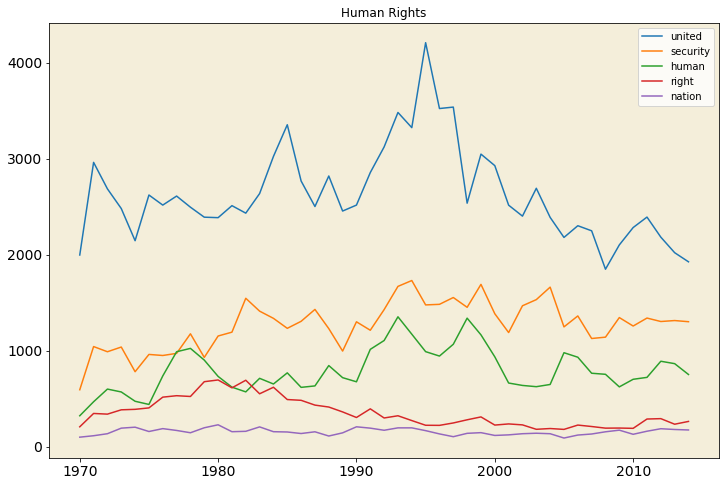

In [100]:
# model  3 -  human rights, 
freqs_df[freqs_df['word'].isin(['human', 'right', 'nation', 'security', 'united'])].iloc[:, 1:47].transpose().iloc[1:].plot(title="Human Rights")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
plt.show()